In [4]:
import tensorflow as tf

In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [7]:
path_train = 'D:\ML_workspace\cotton_prediction\datasets\train'
path_test = 'D:\ML_workspace\cotton_prediction\datasets\test'

In [8]:
image_size = [224,224]

In [9]:
inception = InceptionV3(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

In [10]:
inception

In [11]:
folders = glob(r'D:\ML_workspace\cotton_prediction\datasets\train\*')

In [12]:
folders

['D:\\ML_workspace\\cotton_prediction\\datasets\\train\\diseased cotton leaf',
 'D:\\ML_workspace\\cotton_prediction\\datasets\\train\\diseased cotton plant',
 'D:\\ML_workspace\\cotton_prediction\\datasets\\train\\fresh cotton leaf',
 'D:\\ML_workspace\\cotton_prediction\\datasets\\train\\fresh cotton plant']

In [13]:
for layer in inception.layers:
    layer.trainable = False

In [14]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [15]:
model = Model(inputs = inception.input, outputs = prediction)
model.summary()

# 23 million params

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(r'D:\ML_workspace\cotton_prediction\datasets\train',
                                              target_size=(224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')
                                          
test_set = test_datagen.flow_from_directory(r'D:\ML_workspace\cotton_prediction\datasets\test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [29]:
r = model.fit_generator(train_set, 
                        validation_data= test_set, 
                        epochs=20, 
                        steps_per_epoch= len(train_set), 
                        validation_steps = len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 241s 4s/step - loss: 2.8390 - accuracy: 0.7335 - val_loss: 0.8361 - val_accuracy: 0.7222
Epoch 2/20
61/61 [==============================] - 225s 4s/step - loss: 0.5644 - accuracy: 0.8913 - val_loss: 0.1053 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 223s 4s/step - loss: 0.6160 - accuracy: 0.8934 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 215s 4s/step - loss: 0.5764 - accuracy: 0.9052 - val_loss: 0.2009 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 212s 3s/step - loss: 0.3376 - accuracy: 0.9395 - val_loss: 0.0965 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 216s 4s/step - loss: 0.4589 - accuracy: 0.9308 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 215s 4s/step - loss: 0.380

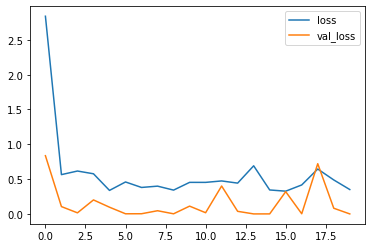

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss_inceptionv3')

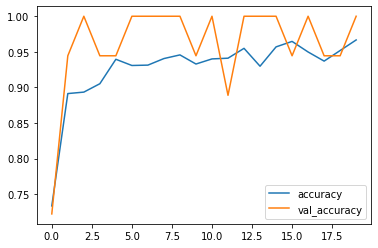

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('acc_val_acc_inceptionv3')


In [33]:
y_pred = model.predict(test_set)
y_pred

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.8170223e-27],
       [0.0000000e+00, 0.0000000e+00, 1.1884088e-37, 1.0000000e+00],
       [1.4661520e-14, 5.3854612e-14, 1.0000000e+00, 2.9326289e-26],
       [1.7732269e-35, 1.0000000e+00, 1.3788003e-28, 1.5966858e-22],
       [1.0000000e+00, 8.1695225e-30, 6.2469322e-26, 1.4616835e-38],
       [1.6556238e-21, 0.0000000e+00, 1.0000000e+00, 2.0857744e-33],
       [1.5335033e-38, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [4.6016399e-07, 6.3476506e-19, 9.9999952e-01, 8.5680096e-17],
       [4.2738547e-12, 5.1347747e-15, 1.0000000e+00, 2.2046094e-11],
       [4.0750187e-05, 1.4950799e-25, 9.9995923e-01, 1.4644285e-19],
       [3.7890813e-21, 1.0000000e+00, 1.8500962e-16, 1.5134924e-10],
       [1.0000000e+00, 0.0000000e+00, 5.9465667e-30, 4.5445409e-24],
       [9.9999976e-01, 2.9245012e-07, 1.6093148e-27, 1.2027939e-21],
       [9.9454869e-23, 2.5283825e-19, 1.6758040e-14, 1.0000000e+00],
       [8.6299998e-08, 1.5469940e-

In [34]:
y_pred.shape

(18, 4)

In [36]:
final_pred = np.argmax(y_pred, axis=1)
final_pred

array([1, 3, 2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 3, 3, 3, 3, 1], dtype=int64)

In [21]:
y_pred.shape

(18, 4)

In [37]:
model.save('model_inceptionv3.h5')

In [3]:
### Tommorrow

In [2]:
from tensorflow.keras.models import load_model

model=load_model('model_inceptionv3.h5')

In [24]:
y_pred = model.predict(test_set)
len(y_pred)

18

In [20]:
y_pred = model.predict(test_set)
y_pred_fin = np.argmax(y_pred, axis=1)
y_pred_fin

array([2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1], dtype=int64)